In [1]:
#import packages
import time
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
import pandas as pd
%matplotlib inline


In [2]:
#Read in data from a data file to data_df in DateFrame format


data_df= pd.read_csv("poly_data.csv")

#verify the dataframe is imported correctly 
print(data_df.head(6))

   Unnamed: 0        X1         X2            y
0           0  1.764052  33.328661  1598.229564
1           1  0.400157   1.183124  -626.277403
2           2  0.978738  27.434845   417.084623
3           3  2.240893  11.530311   113.742012
4           4  1.867558  29.672567  1266.834421
5           5 -0.977278  38.525353   684.595541


## EDA

C:\Users\Darshana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


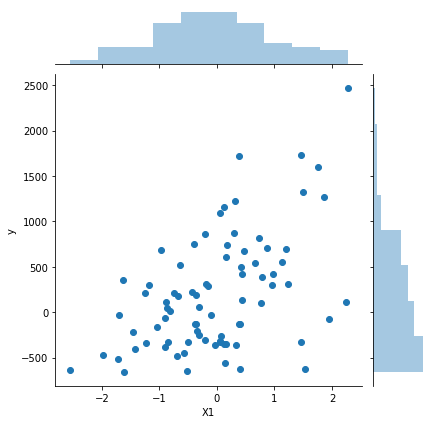

In [3]:
#joint plot (or scatter plot) of X1 and y
sns.jointplot(data_df['X1'], data_df['y'])

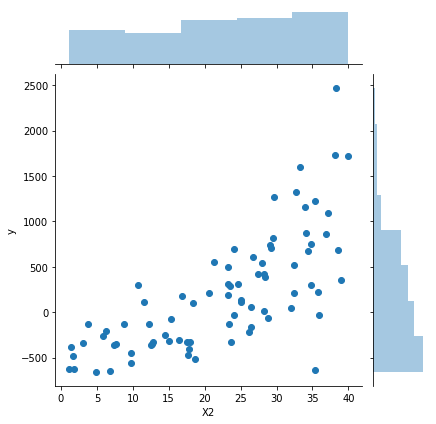

In [4]:
#joint plot (or scatter plot) of X2 and y
sns.jointplot(data_df['X2'], data_df['y'])

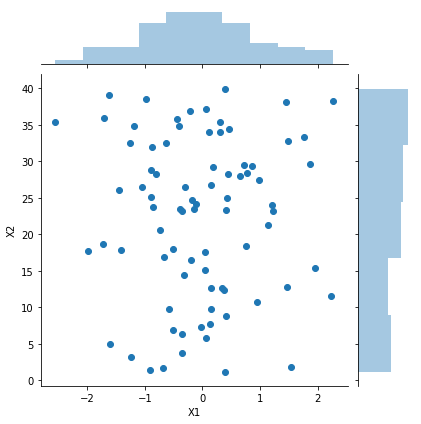

In [5]:
#joint plot (or scatter plot) of X1 and X2
sns.jointplot(data_df['X1'], data_df['X2'])

### Based on observing the above 3 diagrams and the p-values displayed, we found both X1 and X2 have close correlation with y. X1 and X2 are independent from each other. 

### 3. Split the Data

In [6]:
# split the data into training and testing datasets
# the percentage of training data is 75%

#split point 
percentage_for_training = 0.75
n_samples = data_df.shape[0]


number_of_training_data = int(n_samples*percentage_for_training)



#create training and testing datasets
train_df  = data_df[0:number_of_training_data]
test_df = data_df[number_of_training_data:]
print(train_df.shape)
print(test_df.shape)

(60, 4)
(20, 4)


### 4. Create Polynomial Features

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#set the degree to 3
#for degree = 3, we will generate 9 features. 
polynomial_features = PolynomialFeatures(degree=3)

In [8]:
X_poly = polynomial_features.fit_transform(data_df[['X1','X2']])

#extract X for training and testing from the data frames
X_train = X_poly[0:number_of_training_data]
X_test = X_poly[number_of_training_data:]

### 5. Create and Train a Linear Regression Model

In [9]:
# mse() calculates mean square error of a model on given X and y
def mse(X, y, model):
    return  ((y-model.predict(X))**2).sum()/y.shape[0]

In [10]:
# use all the features to train the linear model 
lm = LinearRegression()
lm.fit(X_train, train_df['y'])
train_mse = mse(X_train, train_df['y'], lm)
print("Training Data Set's MSE is: \t", train_mse)
test_mse = mse(X_test, test_df['y'], lm)
print("Testing Data Set's MSE is : \t", test_mse)

Training Data Set's MSE is: 	 34228.56230613586
Testing Data Set's MSE is : 	 43855.49584693896


### 6. Use Lasso in Linear Regression to Penalize Large Number of Features

In [11]:
#import lasso
#lasso is controlled by a parameter alpha.
#by fine tuning this parameter, we can control the number of features

from sklearn.linear_model import Lasso
#Train the model, try different alpha values.
Lasso_model = Lasso(alpha=0.15,normalize=True, max_iter=1e5, )
Lasso_model.fit(X_train, train_df['y'])

Lasso(alpha=0.15, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
#see the trained parameters. Zero means the feature can be removed from the model
Lasso_model.coef_

array([ 0.00000000e+00,  0.00000000e+00,  2.01175754e+01, -1.25276464e+01,
        4.22700925e+00,  0.00000000e+00,  1.29092616e+01, -0.00000000e+00,
        2.57442481e-01,  1.66306861e-02])

In [13]:
#let's see the train_mse and test_mse from Lasso when 
#alpha = 0.15

train_mse = mse(X_train, train_df['y'], Lasso_model)
print("Training Data Set's MSE is: \t", train_mse)
test_mse = mse(X_test, test_df['y'], Lasso_model)
print("Testing Data Set's MSE is : \t", test_mse)

Training Data Set's MSE is: 	 34475.943856232145
Testing Data Set's MSE is : 	 40452.12277027029


In [14]:
#let's try a large range of values for alpha first
#create 50 alphas from 100 to 0.00001 in logspace
alphas = np.logspace(2, -5, base=10, num=50)
alphas

array([1.00000000e+02, 7.19685673e+01, 5.17947468e+01, 3.72759372e+01,
       2.68269580e+01, 1.93069773e+01, 1.38949549e+01, 1.00000000e+01,
       7.19685673e+00, 5.17947468e+00, 3.72759372e+00, 2.68269580e+00,
       1.93069773e+00, 1.38949549e+00, 1.00000000e+00, 7.19685673e-01,
       5.17947468e-01, 3.72759372e-01, 2.68269580e-01, 1.93069773e-01,
       1.38949549e-01, 1.00000000e-01, 7.19685673e-02, 5.17947468e-02,
       3.72759372e-02, 2.68269580e-02, 1.93069773e-02, 1.38949549e-02,
       1.00000000e-02, 7.19685673e-03, 5.17947468e-03, 3.72759372e-03,
       2.68269580e-03, 1.93069773e-03, 1.38949549e-03, 1.00000000e-03,
       7.19685673e-04, 5.17947468e-04, 3.72759372e-04, 2.68269580e-04,
       1.93069773e-04, 1.38949549e-04, 1.00000000e-04, 7.19685673e-05,
       5.17947468e-05, 3.72759372e-05, 2.68269580e-05, 1.93069773e-05,
       1.38949549e-05, 1.00000000e-05])

In [15]:
#use arrays to keep track of the MSE of each alpha used. 
train_mse_array =[]
test_mse_array=[]

#try each alpha
for alpha in alphas:
    
    #create Lasso model using alpha
    Lasso_model = Lasso(alpha=alpha,normalize=True, max_iter=1e5, )
    Lasso_model.fit(X_train, train_df['y'])
    
    #Calculate MSEs of train and test datasets 
    train_mse = mse(X_train, train_df['y'], Lasso_model)
    test_mse = mse(X_test, test_df['y'], Lasso_model)
    
    #add the MSEs to the arrays
    train_mse_array.append(train_mse)
    test_mse_array.append(test_mse)
    

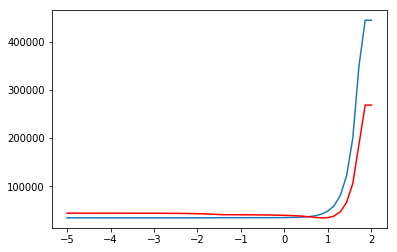

In [16]:
#plot the MSEs based on alpha values
#blue line is for training data
#red line is for the testing data
plt.plot(np.log10(alphas), train_mse_array)
plt.plot(np.log10(alphas), test_mse_array, color='r')

### There is something interesting between 0 and 1 in the above diagram. 0 mean 10^0=1 While 1 means 10^1 = 10  so, we will look closely within this range to find the optimal alpha value

In [30]:
# We can try a smaller search space now (a line space between 1 and 10)
alphas = np.linspace(1, 10, 1000)
train_mse_array =[]
test_mse_array=[]
print(alphas)

[ 1.          1.00900901  1.01801802  1.02702703  1.03603604  1.04504505
  1.05405405  1.06306306  1.07207207  1.08108108  1.09009009  1.0990991
  1.10810811  1.11711712  1.12612613  1.13513514  1.14414414  1.15315315
  1.16216216  1.17117117  1.18018018  1.18918919  1.1981982   1.20720721
  1.21621622  1.22522523  1.23423423  1.24324324  1.25225225  1.26126126
  1.27027027  1.27927928  1.28828829  1.2972973   1.30630631  1.31531532
  1.32432432  1.33333333  1.34234234  1.35135135  1.36036036  1.36936937
  1.37837838  1.38738739  1.3963964   1.40540541  1.41441441  1.42342342
  1.43243243  1.44144144  1.45045045  1.45945946  1.46846847  1.47747748
  1.48648649  1.4954955   1.5045045   1.51351351  1.52252252  1.53153153
  1.54054054  1.54954955  1.55855856  1.56756757  1.57657658  1.58558559
  1.59459459  1.6036036   1.61261261  1.62162162  1.63063063  1.63963964
  1.64864865  1.65765766  1.66666667  1.67567568  1.68468468  1.69369369
  1.7027027   1.71171171  1.72072072  1.72972973  1.

In [31]:
earlier_dif = 5000

#try each alpha
for alpha in alphas:
    
    #create Lasso model using alpha
    Lasso_model = Lasso(alpha=alpha,normalize=True, max_iter=1e5, )
    Lasso_model.fit(X_train, train_df['y'])
    
    #Calculate MSEs of train and test datasets 
    train_mse = mse(X_train, train_df['y'], Lasso_model)
    test_mse = mse(X_test, test_df['y'], Lasso_model)
    
    dif = abs(train_mse-test_mse)
    if(dif < earlier_dif):
        earlier_dif = dif
        best_train_mse = train_mse
        best_test_mse = test_mse
        best_alpha = alpha   
    
    #add the MSEs to the arrays
    train_mse_array.append(train_mse)
    test_mse_array.append(test_mse)
    
#Print best alpha, train_mse and test_mse
print("Train  MSE is", best_train_mse)
print("Test MSE is", best_test_mse)
print("The optimal alpha is", best_alpha)
    

Train  MSE is 36526.13048278059
Test MSE is 36527.79678759875
The optimal alpha is 3.5585585585585586


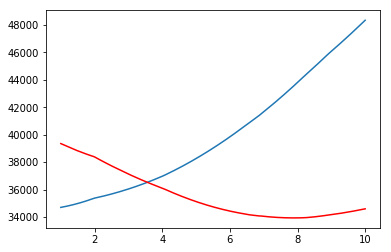

In [34]:
#Plotting MSE's
plt.plot(alphas, train_mse_array)
plt.plot(alphas, test_mse_array, color='r')

### By observing a smaller range of alpha, we can clearly see how the MSEs change as we change the model and features. Use the diagram to explain the trends of the two lines and summarize what you learned so far. 

In [36]:
#Fitting lasso on the best alpha
Lasso_model = Lasso(alpha=3.5585585585585586,normalize=True, max_iter=1e5, )
Lasso_model.fit(X_train, train_df['y'])
Lasso_model.coef_

array([ 0.00000000e+00,  0.00000000e+00,  1.88112048e+01, -0.00000000e+00,
        3.97439082e+00,  0.00000000e+00,  7.23480505e+00, -0.00000000e+00,
        2.55104087e-01,  1.56082808e-02])

In [38]:
## type your code here to describe the above diagram and what you learned 
## so far about feature and model selection ( about 200 words )
print("Alpha value for training data is increasing while for test data it is decreasing, the point at which both intersect can give us the optimal value of alpha fro our model selection. As we found the best alpha we could find the coefficients which are closer to true model as shown above. Although our model would not be too perfect but we can a chieve the closest fit to true model based on MSE values. ")


Alpha value for training data is increasing while for test data it is decreasing, the point at which both intersect can give us the optimal value of alpha fro our model selection. As we found the best alpha we could find the coefficients which are closer to true model as shown above. Although our model would not be too perfect but we can a chieve the closest fit to true model based on MSE values. 
